# Setup

In [3]:
%load_ext autoreload
%autoreload 1
%aimport beams
#%aimport profiles2
%aimport fida
%aimport curvature
%aimport grid
%aimport optics
%aimport signals

import numpy as np
import matplotlib, matplotlib.pyplot
matplotlib.rcParams['figure.dpi'] = 100

import beams
sources = {}
for i in range(1,9):
    sources[i] = beams.HeatingBeam(pini=i, eq_tag='w7x_ref_29')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using Numba
Numpy table interpolation imported.


# Field alignment and Doppler shift

## Candidate ports for analysis

```python
# candidate port XYZ locations [mm]
k20_ports = {
             'A21-mid':np.array([1981.8, 6099.4, 0]),
             'A21-lo':np.array([1981.8, 6099.4, -250]),
             'A21-lolo':np.array([1981.8, 6099.4, -375]),
             'B21':np.array([1718.3, 5960.8, -906.1]),
             'F21':np.array([1075.6, 6306.9, -449.3]),
             'Q20':np.array([2225, 5955.9, -650]),
             'T21':np.array([-930.7, 6276.9, -152.5]),
             'Y21':np.array([442.7, 6312.2, -736.7]),
             'W20':np.array([4773.9, 3671.2, 346.7]),
             'V11':np.array([4216.9, 2710.2, -642.1]),
             'W11':np.array([4966.7, 3405.8, -346.7]),
             'U20':np.array([5063.6, 3707.1, 0]),
             }
k21_ports = {
             'A21-mid':np.array([1981.8, 6099.4, 0]),
             'A21-hi':np.array([1981.8, 6099.4, 250]),
             'A21-hihi':np.array([1981.8, 6099.4, 375]),
             'B20':np.array([2113.5, 5832.3, 906.1]),
             'F20':np.array([2836.9, 5734.6, 449.3]),
             'Q21':np.array([1703.2, 6127.2, 650.4]),
             'T20':np.array([4457.1, 4548.3, 159.9]),
             'Y20':np.array([3352.1, 5366.8, 736.7]),
             'W21':np.array([-1704.3, 5776, -346.7]),
             'V30':np.array([-1818.2, 4671.7, 641.1]),
             'W30':np.array([-2016.1, 5674.7, 346.2]),
             'U30':np.array([-1939.3, 5968.7, 0]),
             }
```

## Calculations along beam axis
All calculations are H injection at 60 keV and "high mirror" configuration unless otherwise noted.

### Sources 3/4/7/8

**Operational** for OP2.  Source 3/4 are symmetric with 7/8.

Saving plots/P7_w7x_ref_29_onaxis.pdf
Saving plots/P8_w7x_ref_29_onaxis.pdf


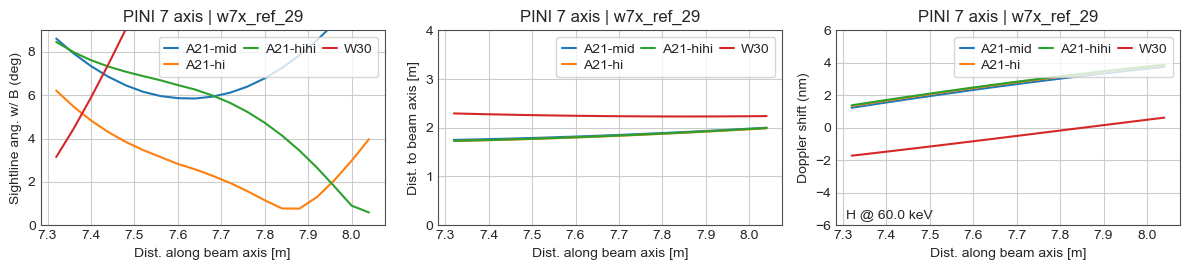

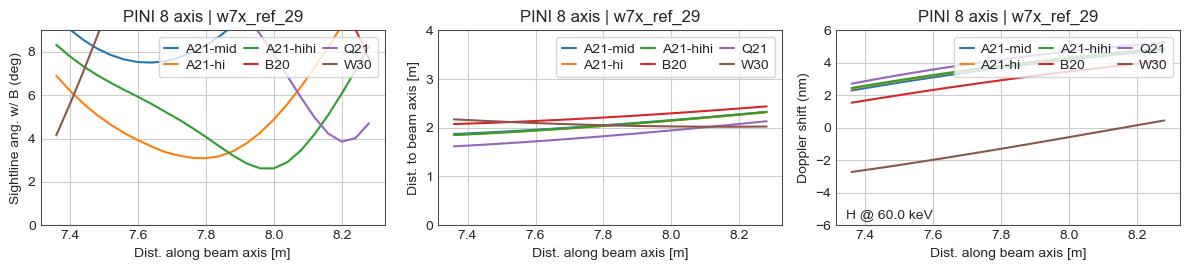

In [74]:
sources[7].plot_onaxis(save=True)
sources[8].plot_onaxis(save=True)

### Sources 1/2/5/6

**Not operational** for OP2.  Sources 1/2 are symmetric with 5/6.

Saving plots/P5_w7x_ref_29_onaxis.pdf
Saving plots/P6_w7x_ref_29_onaxis.pdf


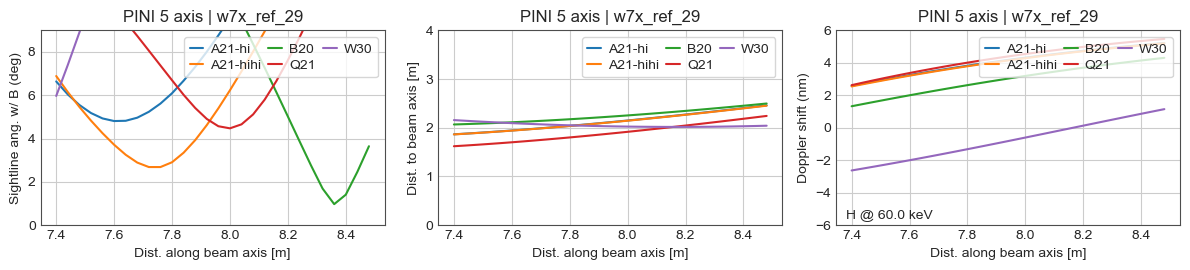

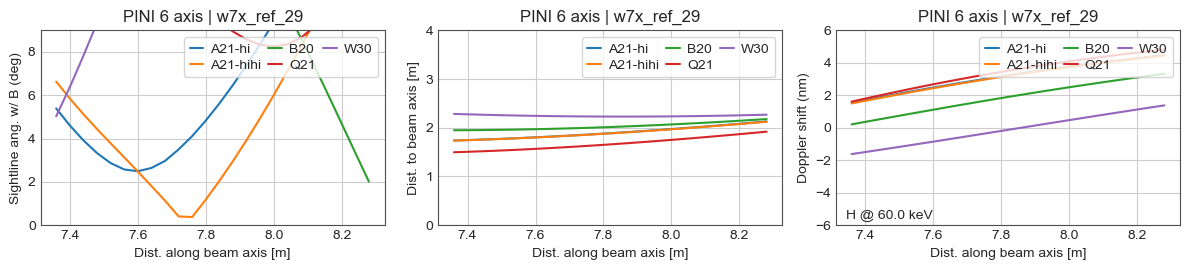

In [75]:
sources[5].plot_onaxis(save=True)
sources[6].plot_onaxis(save=True)

## Calculations in beam plane
Beam contours are 70%/80%/90% intensity contours with 1 deg. divergence (no attenuation from beam deposition)

### A21-hihi viewing sources 5-8

Symmetric with A21-lolo viewing sources 1-4

Saving plots/A21-hihi_P5_w7x_ref_29.pdf
Saving plots/A21-hihi_P6_w7x_ref_29.pdf
Saving plots/A21-hihi_P7_w7x_ref_29.pdf
Saving plots/A21-hihi_P8_w7x_ref_29.pdf


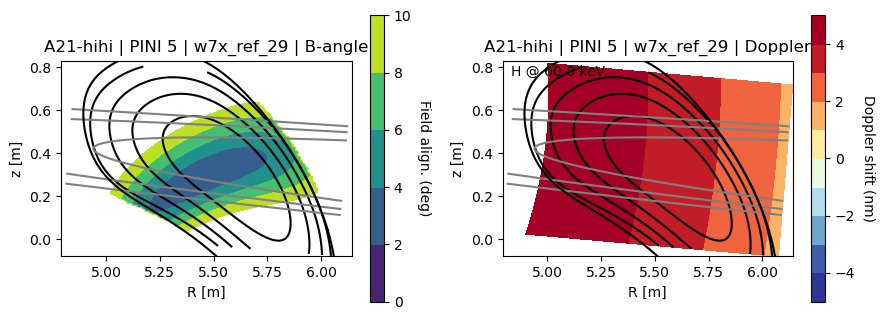

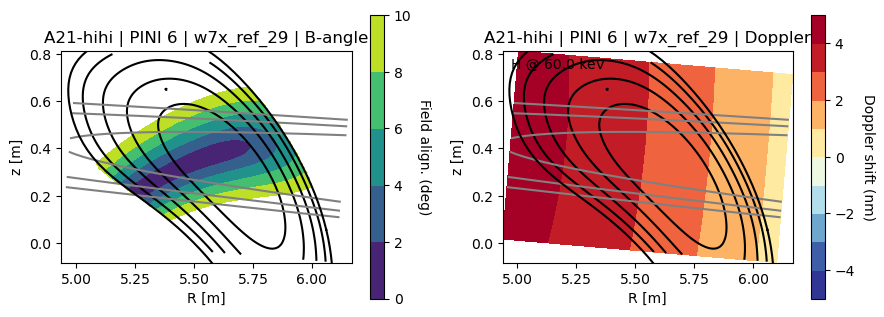

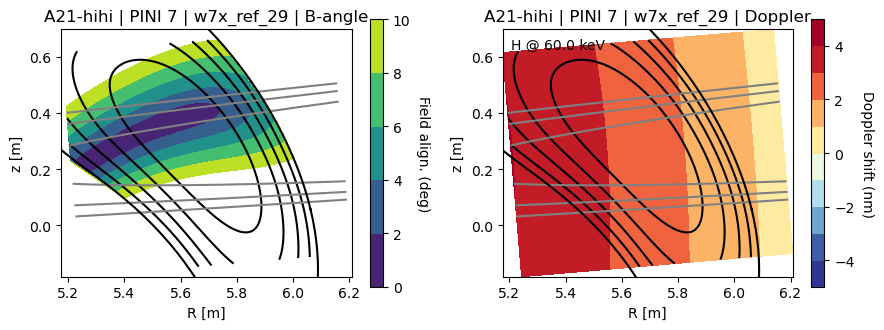

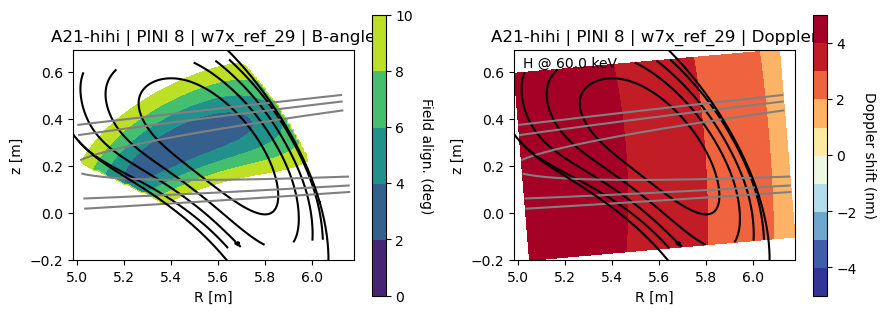

In [4]:
for i in range(5,9):
    sources[i].plot_vertical_plane(port='A21-hihi', eq_tag='w7x_ref_29', save=True)

### W30 viewing sources 5-8

Symmetric with W11 viewing sources 1-4

Saving plots/W30_P5_w7x_ref_29.pdf
Saving plots/W30_P6_w7x_ref_29.pdf
Saving plots/W30_P7_w7x_ref_29.pdf
Saving plots/W30_P8_w7x_ref_29.pdf


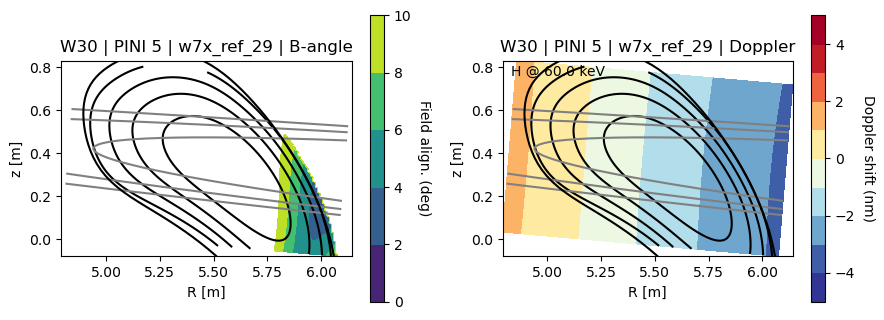

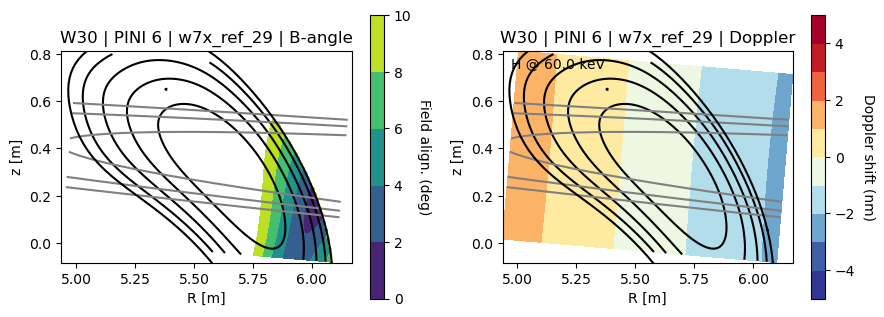

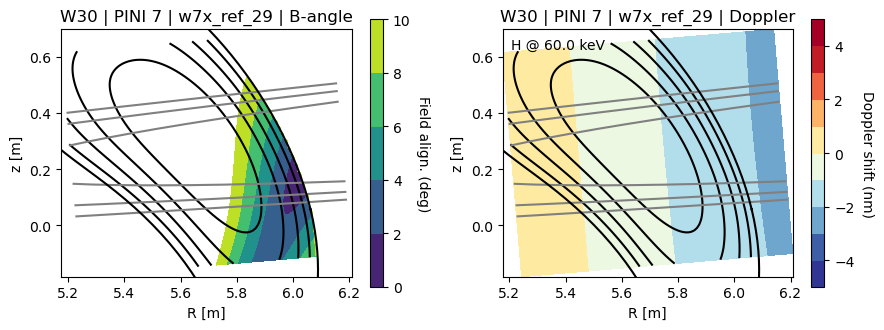

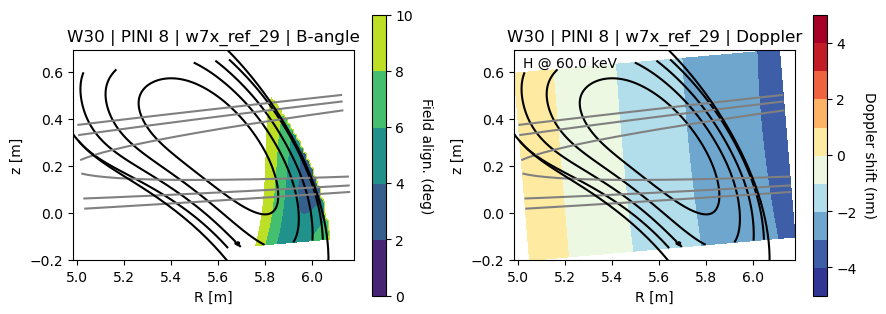

In [5]:
for i in range(5,9):
    sources[i].plot_vertical_plane(port='W30', eq_tag='w7x_ref_29', save=True)

## Summary

| Port | Source (OP2 status) | Region with field alignment | Doppler shift (H@60keV) | Distance |
| :--- | :--- | :--- | :--- | :--- |
| A21 (low/high) | Src 1/5 (no) | Large mid-radius region < 6 deg. | ~ 3 nm red shift | ~ 1.9 m |
| A21 (low/high) | Src 2/6 (no) | **Large mid-radius region < 4 deg.** | ~ 2 nm red shift| ~ 1.8 m |
| A21 (low/high) | Src 3/7 (yes) | Large mid-radius region < 6 deg. | ~ 1.8 nm red shift | ~ 1.8 m |
| A21 (low/high) | Src 4/8 (yes) | Large mid-radius region < 6 deg. | ~ 2.8 nm red shift | ~ 1.9 m |
| W11/W30 | Src 1/5 (no) | Small edge region < 6 deg. | ~ 2.7 nm blue shift | ~ 2.1 m |
| W11/W30 | Src 2/6 (no) | **Small edge region < 4 deg.** | ~ 1.7 nm blue shift | ~ 2.3 m |
| W11/W30 | Src 3/7 (yes) | **Small edge region < 4 deg.** | ~ 1.7 nm blue shift | ~ 2.3 m |
| W11/W30 | Src 4/8 (yes) | Small edge region < 6 deg. | ~ 2.7 nm blue shift | ~ 2.1 m |

W30 is available, but W11 and A21 are not available in the near-future.

<!---
- There are symmetric viewing configurations for all port/beam combinations
  - For example, A21-lolo viewing source 2 is symmetric with A21-hihi viewing source 6
  - W11 viewing source 4 is symmetric with W30 viewing source 8
- Best viewing options
  - A21-hihi viewing source 6 (symmetric with A21-lolo viewing source 2)
    - Sources 2/6 are **unavailable** for OP2
    - Red-shift view
    - Good coverage edge to core
    - Port status
      - A21-lolo is permanently occupied by CIS
      - A21-hihi **may be** available in 6+ years
    - Alternative views from A21-hihi
      - Source 5: degraded field alignment and larger red-shift
      - Source 7: degraded field alignment and similar red-shift
      - Source 8: degraded field alignment and larger red-shift
  - W30 viewing sources 7/8 (symmetric with W11 viewing sources 3/4)
    - Sources 3/4/7/8 are **available** for OP2
    - Blue-shift view
    - Good coverage edge to mid-radius
    - Port status
      - W11 is permanently occupied by XMCTS
      - W30 is **available**
    - W30 viewing source 7
      - Better field alignment, but less blue-shift and longer beam-port distance
    - W30 viewing source 8
      - Larger blue-shift and shorter beam-port distance, but less field alignment
- Summary
  - Right now, W30 viewing sources 7/8 is the best feasible option.
  - In the distant future, A21-hihi viewing source 6 is a strong candidate.
--->

# Channel spacing and max $k\rho_i$ sensitivity

## Post-pellet regime

Issues loading MdsShr, trying find_library
consider installing grequests for python for parallel async download!
Available profile data in data/profile_data_180904027.pickle
Saving profile data in data/profile_data_180904027.pickle
Doing ne fits
Doing te fits
Doing ti fits


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


Saving plots/profiles_180904027_1900s.pdf
Using atomic mass = 1 AMU for rho-i
C2C = 1.00 cm  -> kmax = 3.14 1/cm
  max(k*rhoi) = 0.80 at r/a = 0.55
  max(k*rhoi) = 0.56 at r/a = 0.75
  max(k*rhoi) = 0.20 at r/a = 0.95
C2C = 1.50 cm  -> kmax = 2.09 1/cm
  max(k*rhoi) = 0.53 at r/a = 0.55
  max(k*rhoi) = 0.38 at r/a = 0.75
  max(k*rhoi) = 0.13 at r/a = 0.95
Saving plots/k-omega_180904027_1900ms.pdf


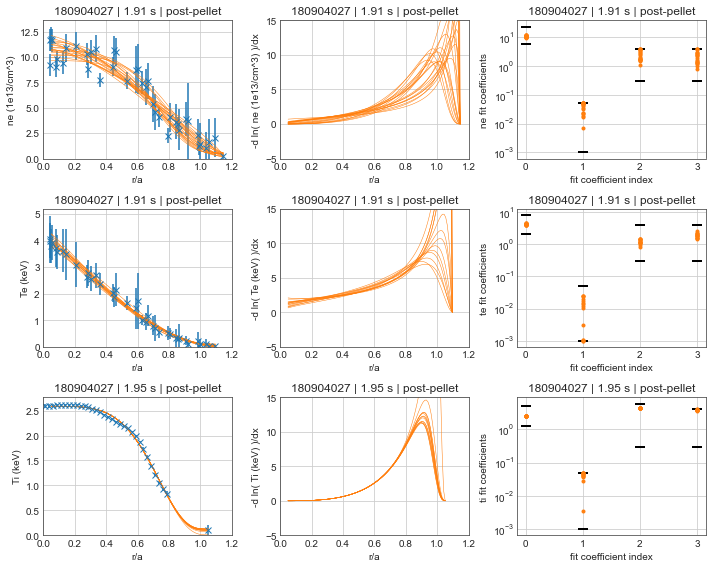

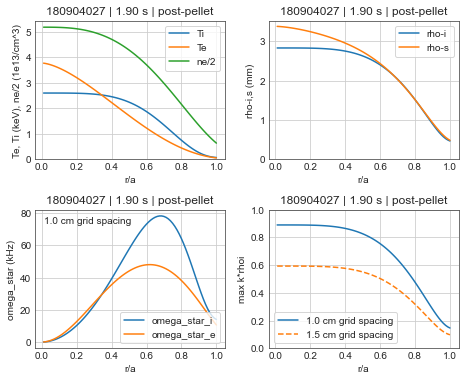

In [1]:
import profiles2
pro = profiles2.Profiles(iprofile=0)
pro.plot_fits(save=True)
pro.plot_profiles2(save=True)

## NBI heating regime

Available profile data in data/profile_data_180919007.pickle
Saving profile data in data/profile_data_180919007.pickle
Doing ne fits
Doing te fits
Doing ti fits
Saving plots/profiles_180919007_2400s.pdf
Using atomic mass = 1 AMU for rho-i
C2C = 1.00 cm  -> kmax = 3.14 1/cm
  max(k*rhoi) = 0.66 at r/a = 0.5
  max(k*rhoi) = 0.54 at r/a = 0.7
  max(k*rhoi) = 0.33 at r/a = 0.9
C2C = 1.50 cm  -> kmax = 2.09 1/cm
  max(k*rhoi) = 0.44 at r/a = 0.5
  max(k*rhoi) = 0.36 at r/a = 0.7
  max(k*rhoi) = 0.22 at r/a = 0.9
Saving plots/k-omega_180919007_2400ms.pdf


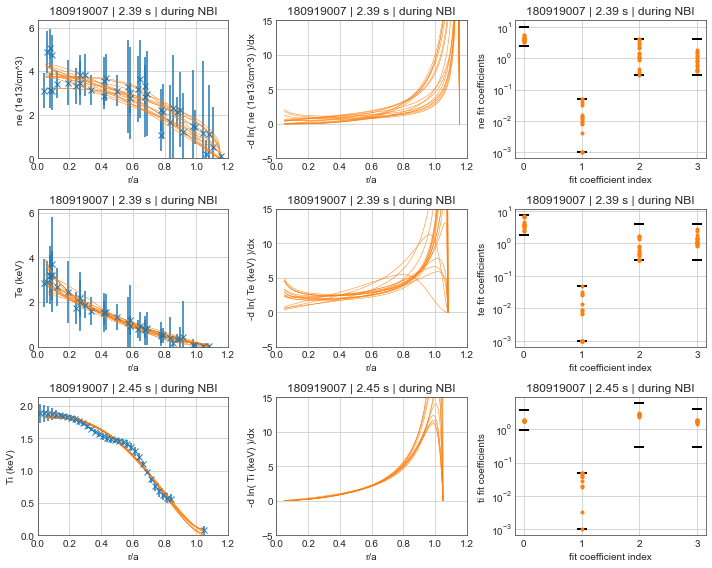

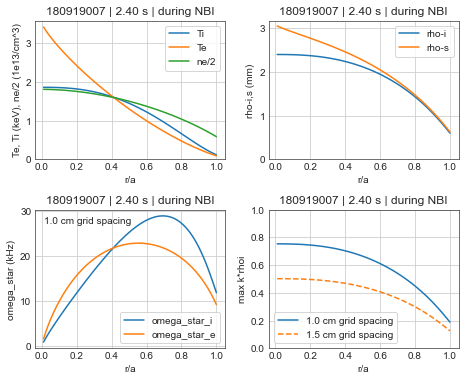

In [7]:
import profiles2
pro = profiles2.Profiles(iprofile=1)
pro.plot_fits(save=True)
pro.plot_profiles2(save=True)

## Summary

| Regime and r/a | max($k\rho_i$)<br>1 cm chan. spacing | max($k\rho_i$)<br>1.5 cm chan. spacing |
| :--- | :---: | :---: |
| **Post-pellet** | | |
| 0.5 | 0.83 | 0.55 |
| 0.7 | 0.64 | 0.43 |
| 0.9 | 0.28 | 0.19 |
| **NBI heating** | | |
| 0.5 | 0.66 | 0.44 |
| 0.7 | 0.54 | 0.36 |
| 0.9 | 0.33 | 0.22 |

# Sightline grids and spatial coverage

## W30 viewing source 7

Loaded data/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 1.49 0.53
Min/max psinorm: 0.49 0.94
Saving plots/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pdf
Loaded data/grid_88_c2c15_P7_W30_R596_Z17_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 2.50 1.09
Min/max psinorm: 0.30 0.90
Saving plots/grid_88_c2c15_P7_W30_R596_Z17_w7x_ref_29.pdf


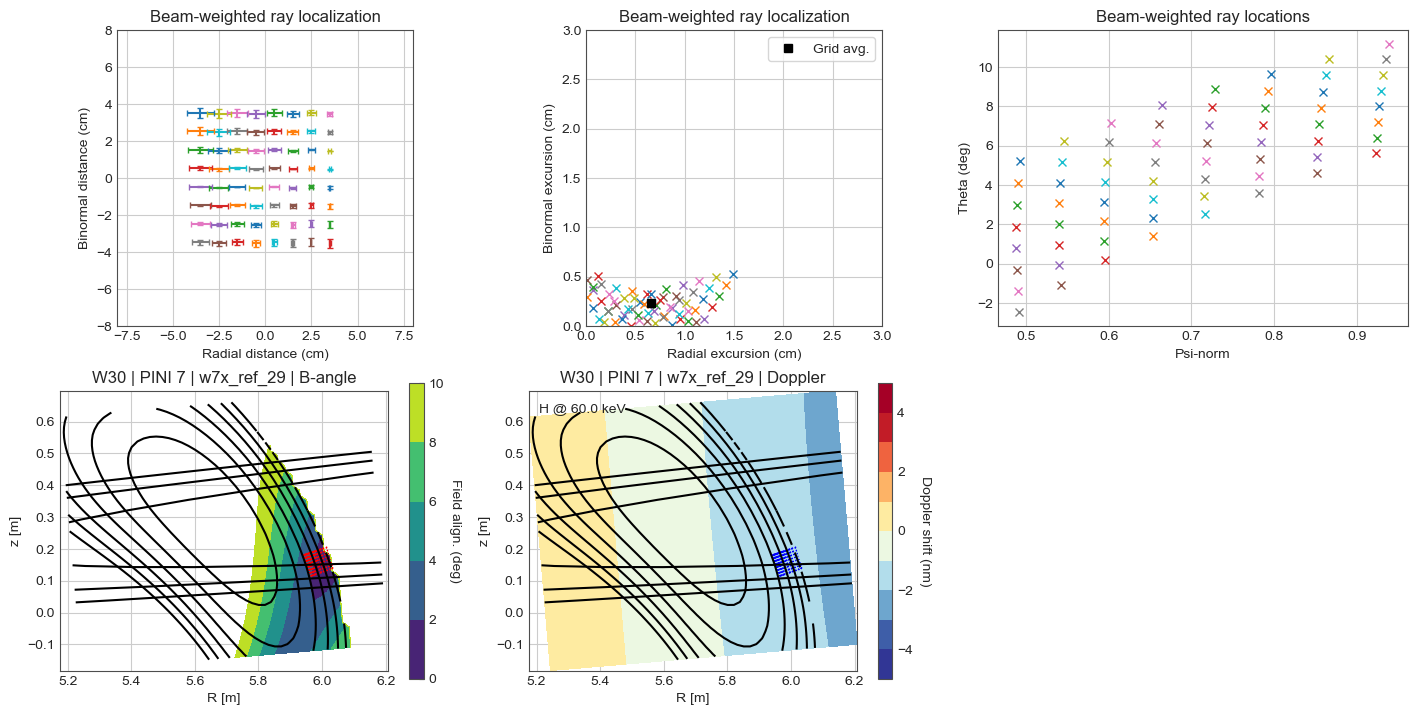

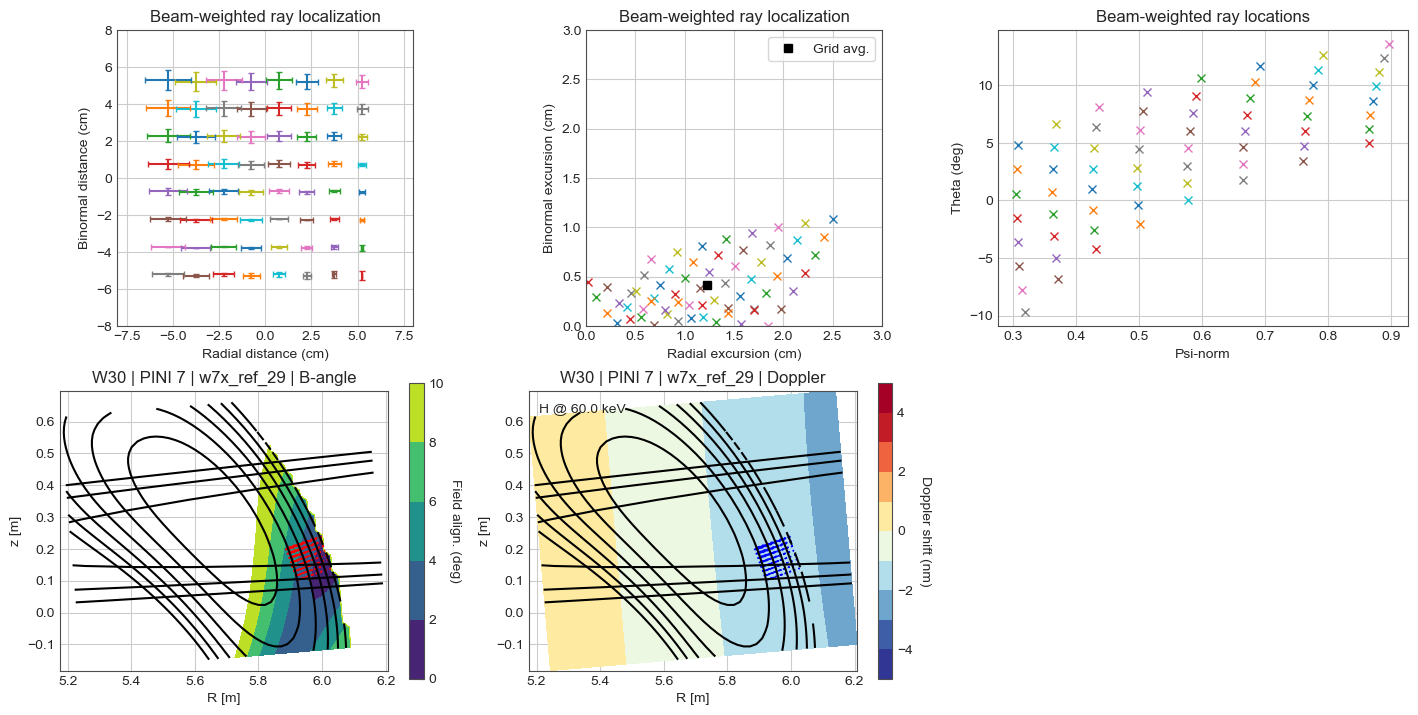

In [80]:
from grid import Grid
grid = Grid(beam=sources[7],
                 port='W30',
                 r_obs=5.99, 
                 z_obs=0.16,
                 c2c_normal=1,
                 eq_tag='w7x_ref_29')
grid.plot(save=True)
grid = Grid(beam=sources[7],
            port='W30',
            r_obs=5.96, 
            z_obs=0.17,
            c2c_normal=1.5,
            eq_tag='w7x_ref_29')
grid.plot(save=True)

## A21-hihi viewing source 6

Loaded data/grid_88_c2c10_P6_A21_R580_Z44_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 2.22 1.19
Min/max psinorm: 0.30 0.65
Saving plots/grid_88_c2c10_P6_A21_R580_Z44_w7x_ref_29.pdf
Loaded data/grid_88_c2c15_P6_A21_R582_Z43_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 2.37 1.90
Min/max psinorm: 0.27 0.84
Saving plots/grid_88_c2c15_P6_A21_R582_Z43_w7x_ref_29.pdf


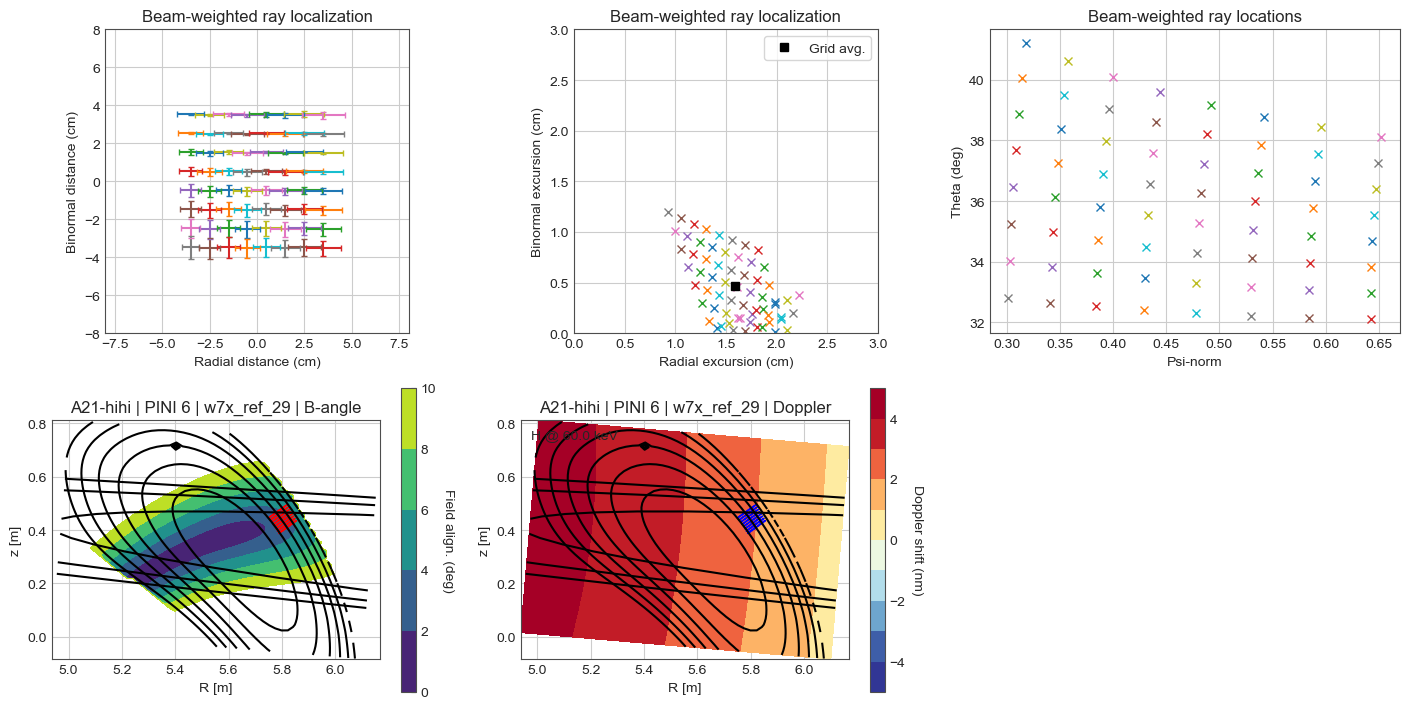

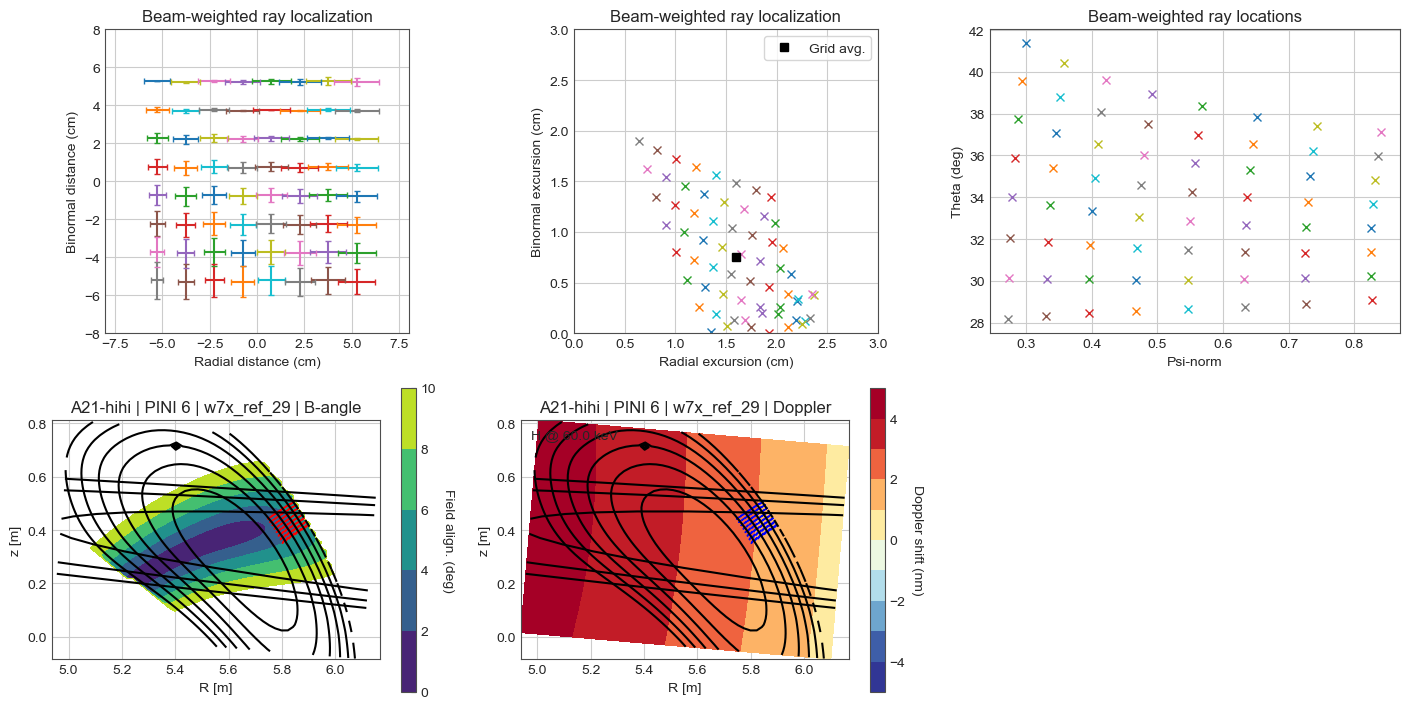

In [81]:
from grid import Grid
grid = Grid(beam=sources[6],
            port='A21-hihi',
            r_obs=5.80, 
            z_obs=0.44,
            c2c_normal=1,
            eq_tag = 'w7x_ref_29')
grid.plot(save=True)
grid = Grid(beam=sources[6],
            port='A21-hihi',
            r_obs=5.82, 
            z_obs=0.43,
            c2c_normal=1.5,
            eq_tag = 'w7x_ref_29')
grid.plot(save=True)

## A21-hihi viewing source 7

Loaded data/grid_88_c2c10_P7_A21_R582_Z39_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 1.76 2.21
Min/max psinorm: 0.25 0.59
Saving plots/grid_88_c2c10_P7_A21_R582_Z39_w7x_ref_29.pdf


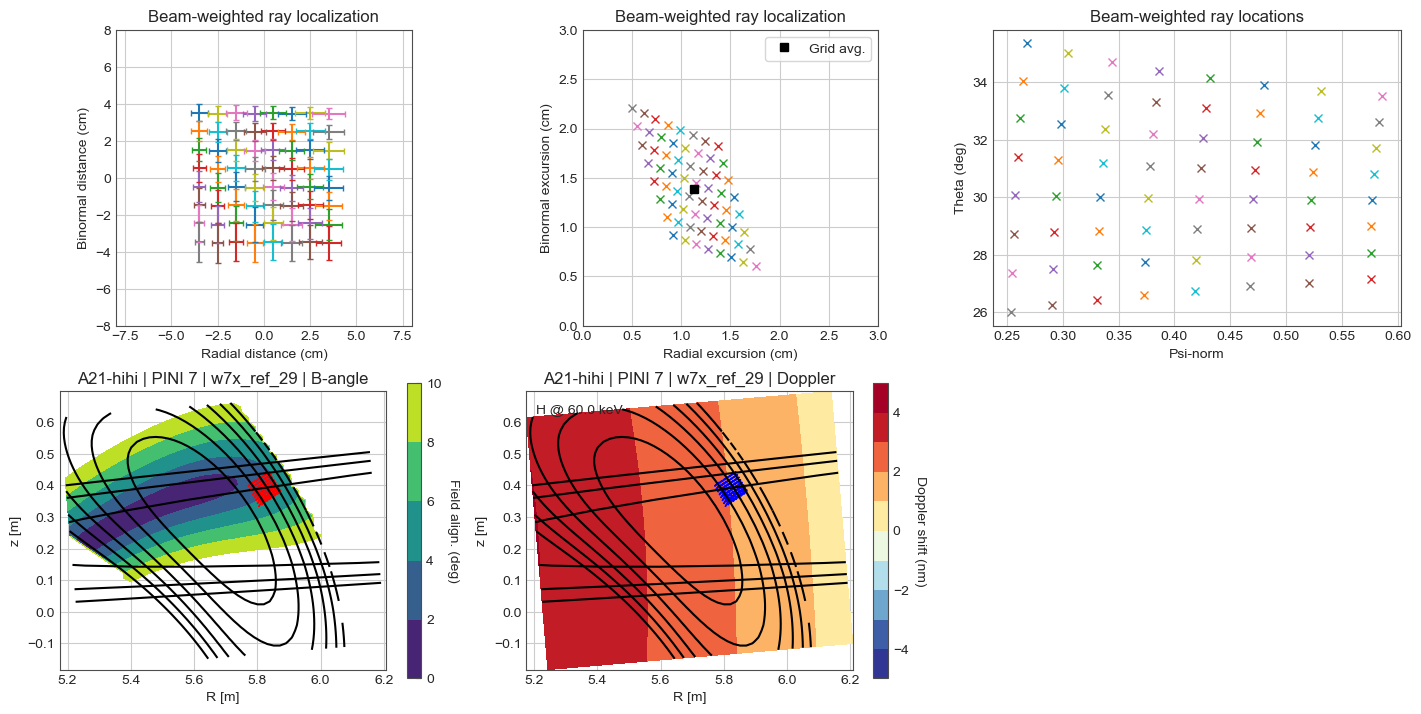

In [82]:
from grid import Grid
grid = Grid(beam=sources[7],
            port='A21-hihi',
            r_obs=5.82, 
            z_obs=0.39,
            c2c_normal=1,
            eq_tag = 'w7x_ref_29')
grid.plot(save=True)

## Summary

| Port | Source | Chan. spacing | Max rad. excur. | Max pol. excur. | Psi-min | Psi-max |
| :--- | :--- | ---: | ---: | ---: | ---: | ---: |
| W30 | Src 7 | 1 cm | **1.5 cm** | **0.5 cm** | **0.5** | **0.95** |
| W30 | Src 7 | 1.5 cm | 2.5 cm | 1.1 cm | 0.3| 0.9 |
| W30 | Src 8 | 1 cm | 2.5 cm | 1.0 cm | 0.5 | 0.95 |
| W30 | Src 8 | 1.5 cm | 3.6 cm | 0.9 cm | 0.3 | 0.9 |
| A21 high | Src 6 | 1 cm | 2.2 cm | 1.2 cm | 0.3 | 0.65 |
| A21 high | Src 6 | 1.5 cm | 2.4 cm | 1.9 cm | 0.3 | 0.85 |
| A21 high | Src 7 | 1 cm | 1.8 cm | 2.2 cm | 0.26 | 0.6 |

<!---
- W30 viewing sources 7/8
  - W30 is **available** and sources 7/8 are **operational** for OP2
  - Blue-shift
  - W30 viewing source 7
    - Best field alignment and spatial localization
    - Spatial localization is sufficient for 1 cm channel spacing for higher max(k*rhoi)
    - 1.7 nm blue shift
    - Good field alignment for mid-radius to edge coverage
  - W30 viewing source 8
    - Degraded field alignment and spatiallocalization
    - 2.7 nm blue shift
- A21-hihi
  - A21-hihi **may be** available in 6+ years
  - Viewing source 6
    - Source 6 is **not operational** with no plans for installation
    - Best A21-hihi view in terms of field alignment and spatial localization
    - Red-shift about 2 nm, so complication from C impurity lines
    - Spatial localization is marginally adequate for 1.5 cm channel spacing
  - Viewing sources 7/8
    - Sources 7/8 are **operational** for OP2
    - Degraded field alignment and spatial localization compared to source 6
--->

# Emission spectra

## Measured spectra

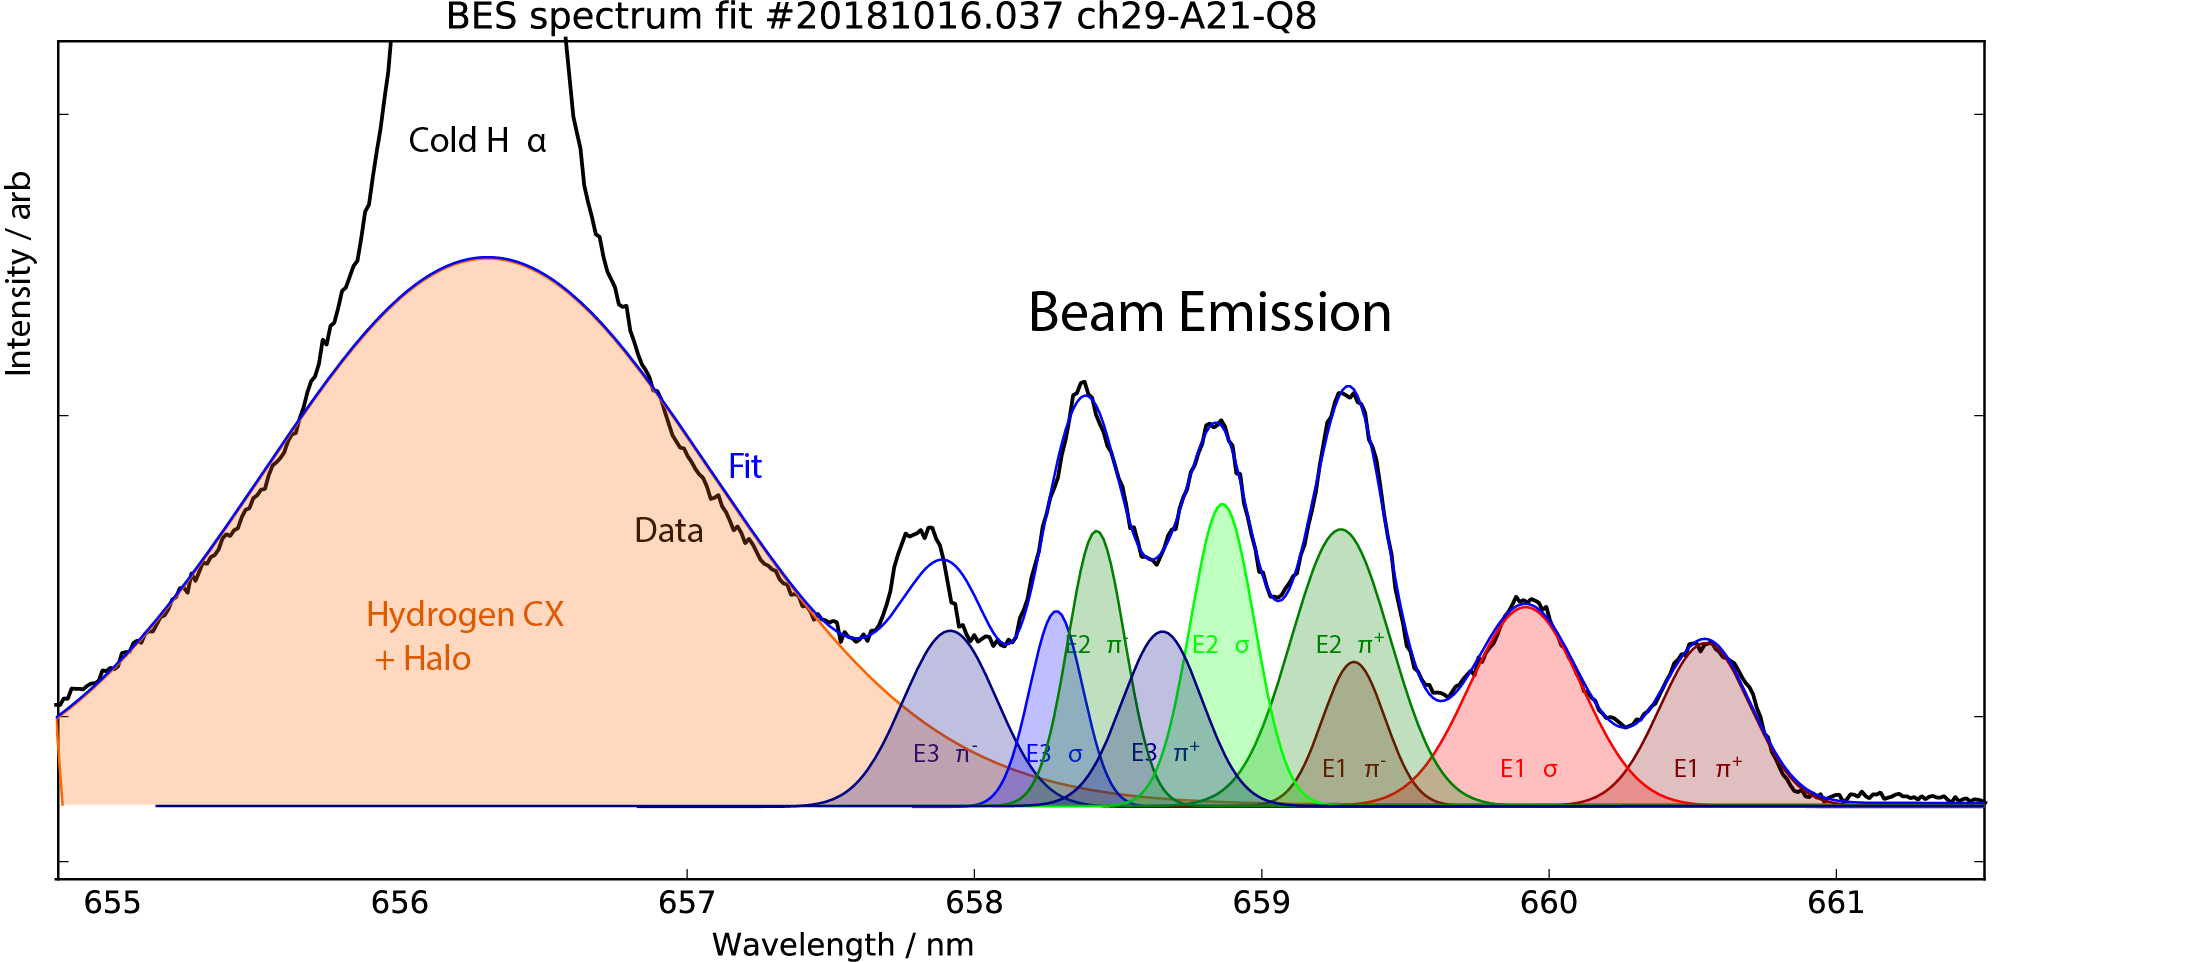

In [83]:
from IPython.display import Image
Image(filename='graphics/spectrum-1.png')

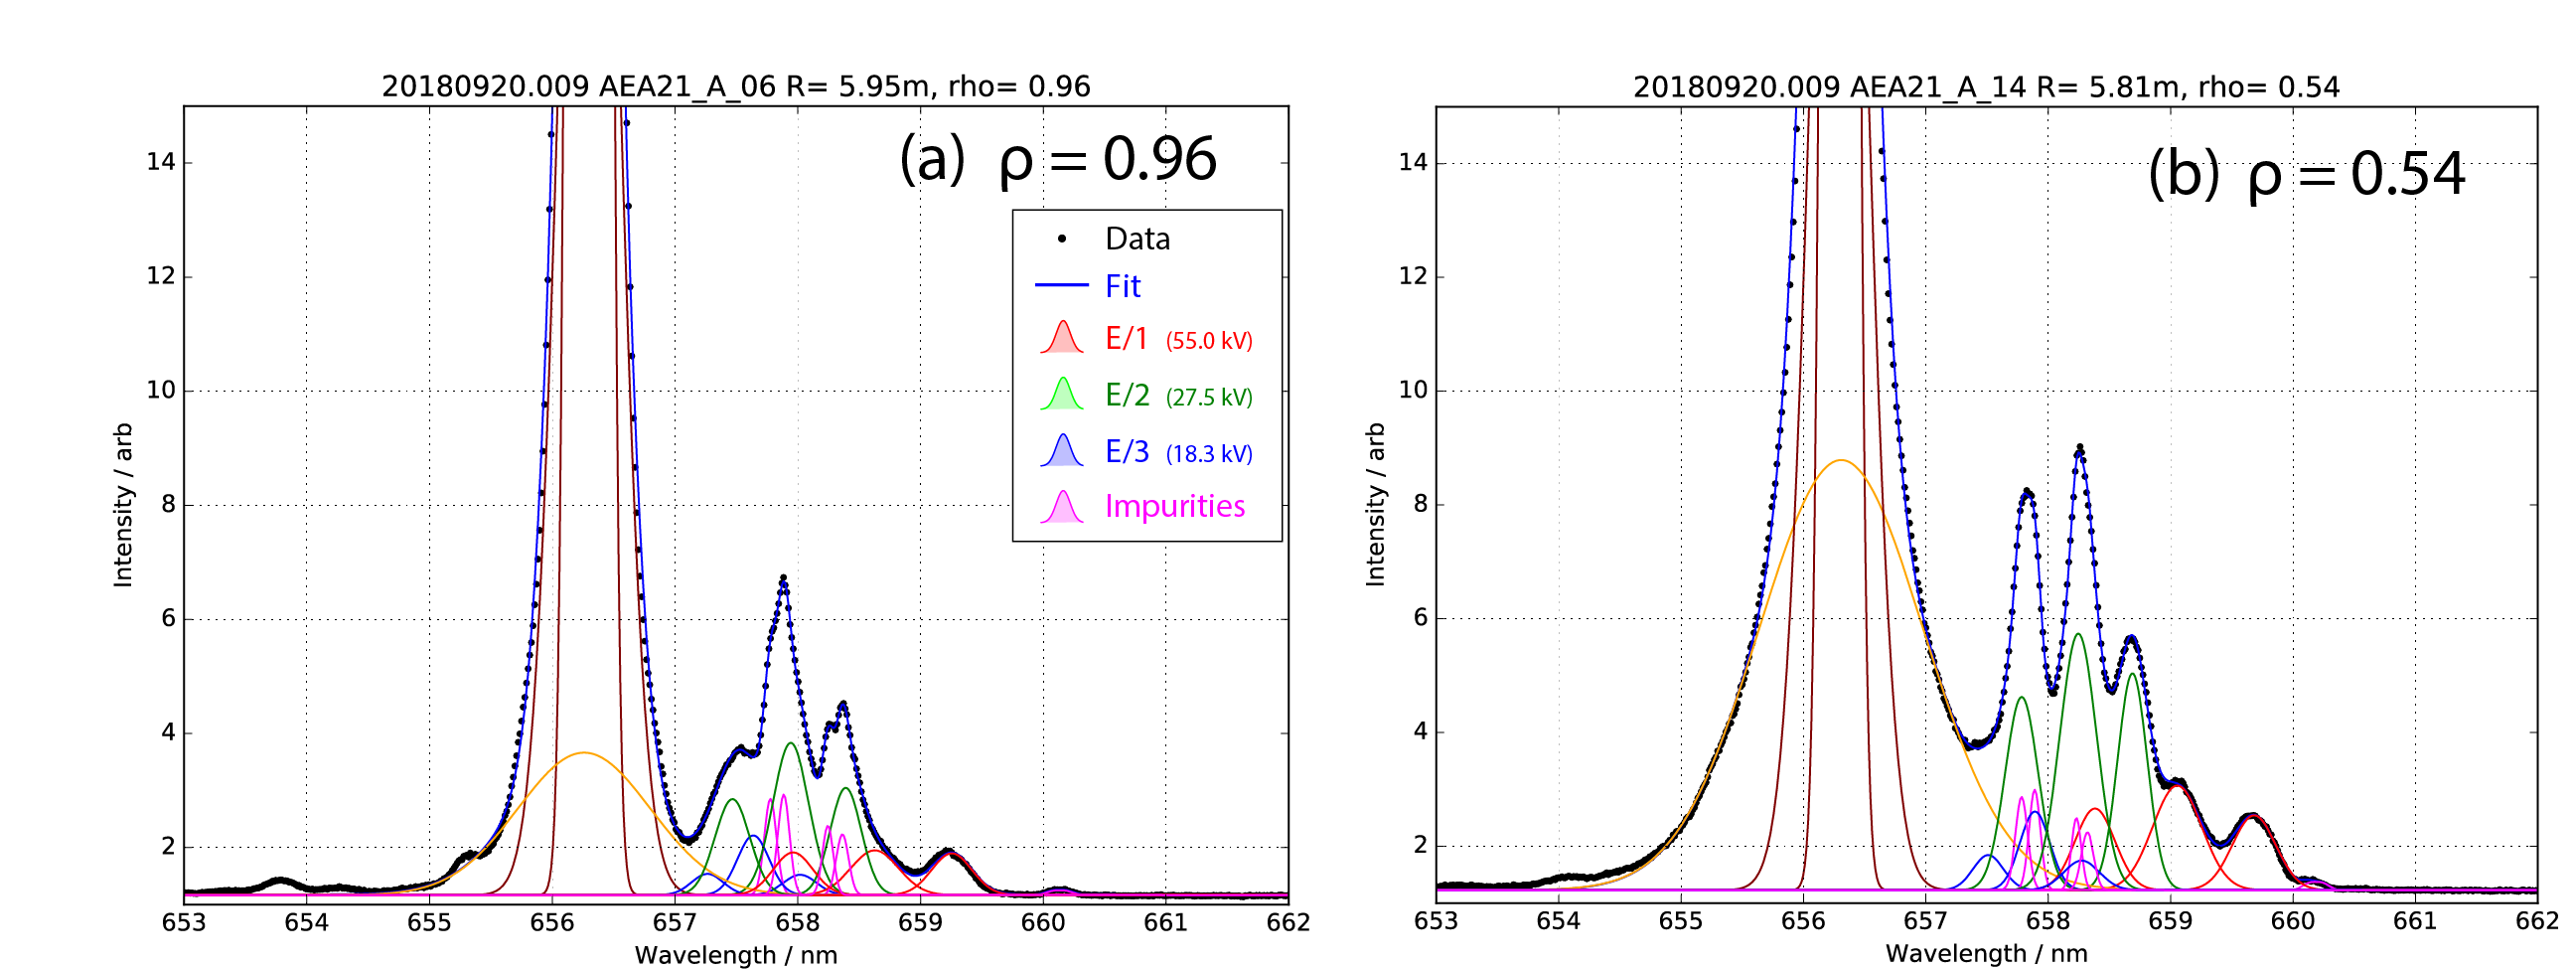

In [84]:
Image(filename='graphics/spectrum-2.png')

## FIDASIM spectra

### W30 viewing source 7

FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/W30_P7/grid3d.hdf5
Using gridfile data/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pickle
Loaded data/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pickle
Using saved sightline grid data
Saving plots/fida_grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pdf
Saving plots/W30_P7_R580_Z20.pdf
Saving plots/fida_array_W30_P7_R580_Z20.pdf


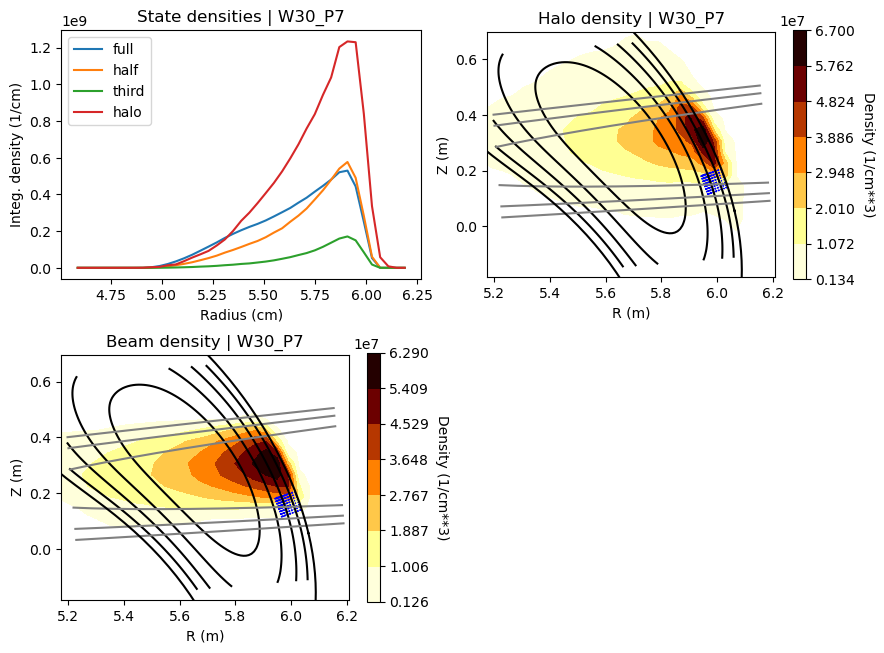

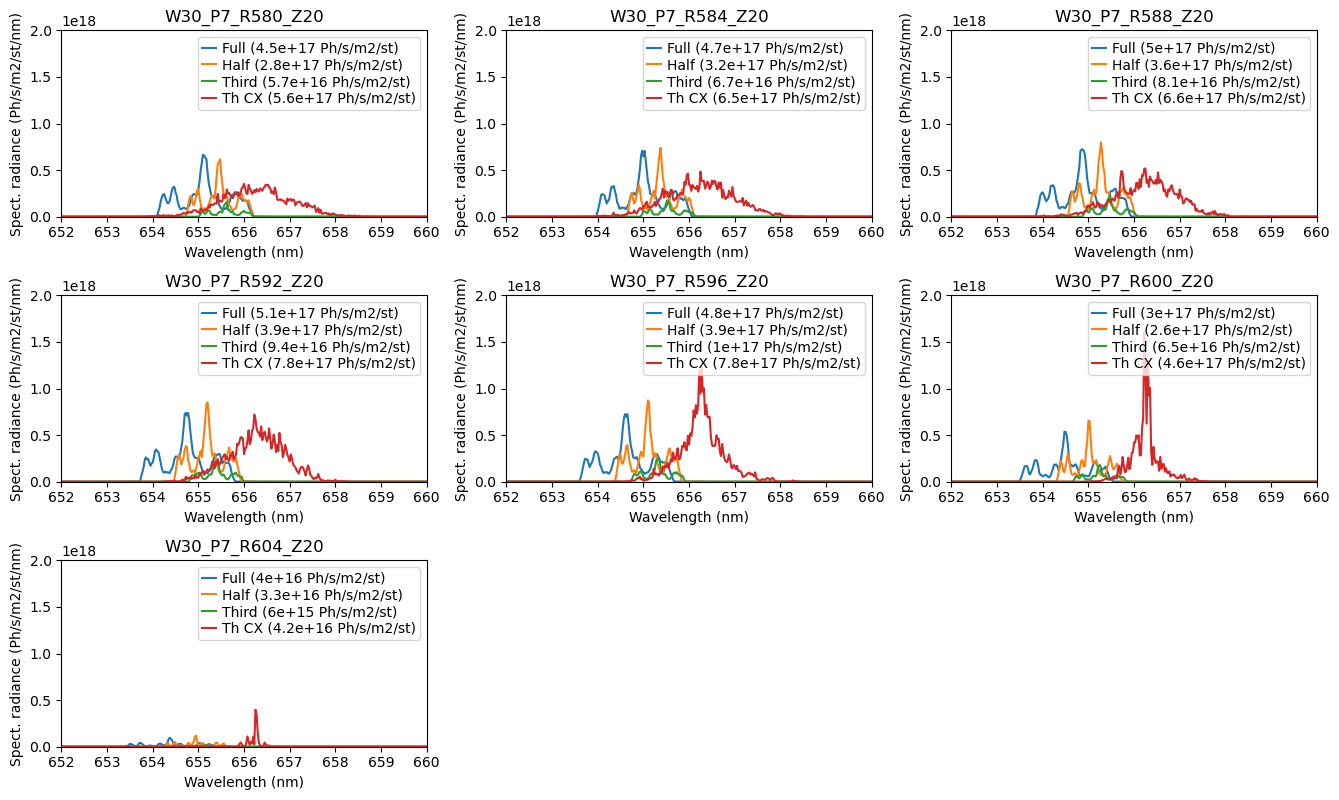

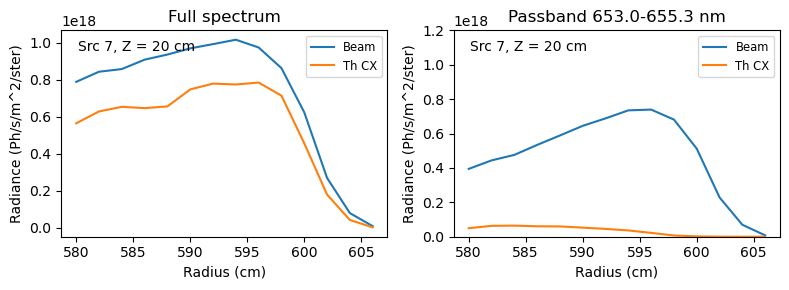

In [8]:
from fida import Fida
f = Fida(simdir='W30_P7')
f.plot_beam_density(gridfile='data/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pickle', save=True)
ilos = f.los_filter(tag='Z20')
f.plot(ilos=ilos[::2], save=True)
f.plot_radial_array(z=20, passband=[653,655.3], save=True)

Loaded data/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 1.49 0.53
Min/max psinorm: 0.49 0.94
Saving plots/grid_88_c2c10_P7_W30_R599_Z16_w7x_ref_29.pdf
Loaded data/grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pickle
Using saved sightline grid data
Max rad/binorm excursion (cm): 2.05 1.32
Min/max psinorm: 0.45 0.89
Saving plots/grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pdf
FIDASIM results: data/FIDASIM/W30_P7
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/W30_P7/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/W30_P7/grid3d.hdf5
Using gridfile data/grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pickle
Loaded data/grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pickle
Using saved sightline grid data
Saving plots/fida_grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pdf


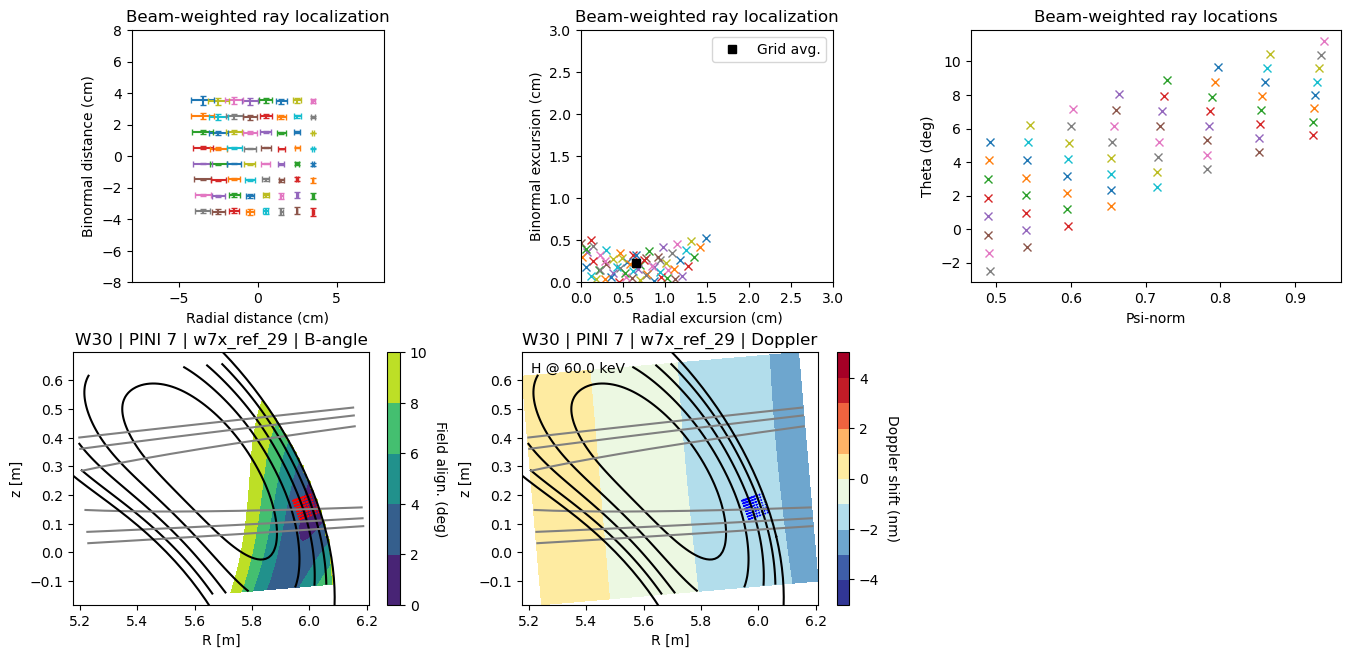

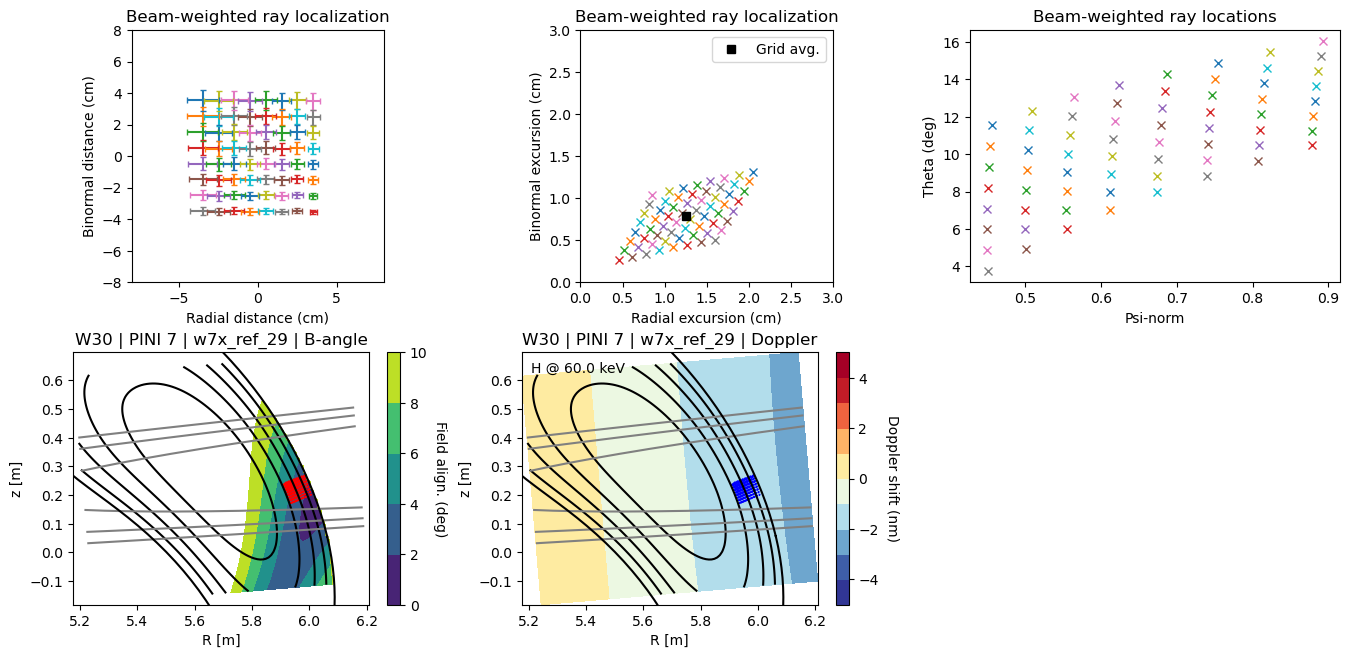

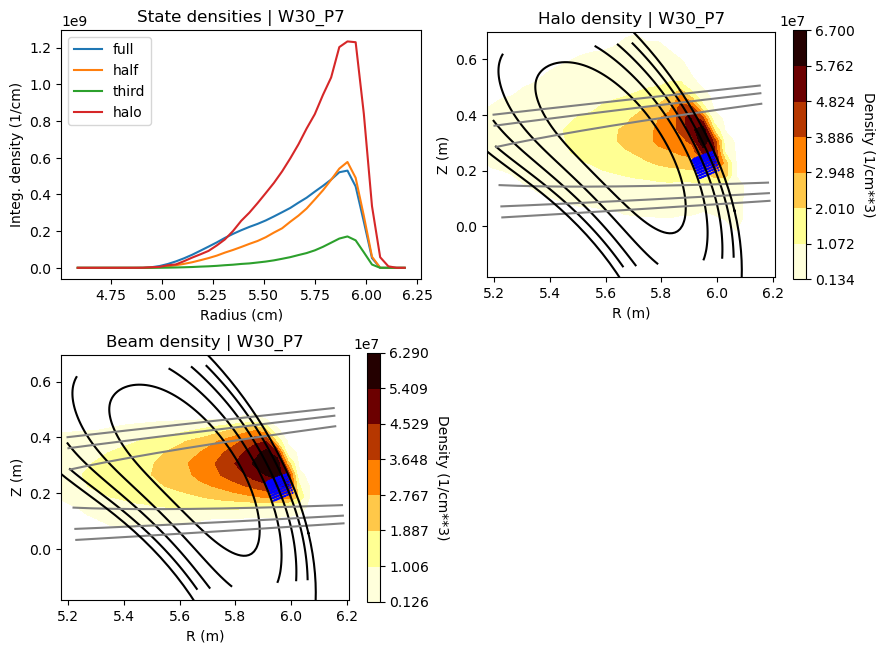

In [9]:
from grid import Grid
grid = Grid(beam=sources[7],
                 port='W30',
                 r_obs=5.99, 
                 z_obs=0.16,
                 c2c_normal=1,
                 eq_tag='w7x_ref_29')
grid.plot(save=True)
grid = Grid(beam=sources[7],
                 port='W30',
                 r_obs=5.96, 
                 z_obs=0.22,
                 c2c_normal=1,
                 eq_tag='w7x_ref_29')
grid.plot(save=True)
from fida import Fida
f = Fida(simdir='W30_P7')
f.plot_beam_density(gridfile='data/grid_88_c2c10_P7_W30_R596_Z22_w7x_ref_29.pickle', save=True)

### A21-hihi viewing source 6

FIDASIM results: data/FIDASIM/A21_HIHI_P6
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/A21_HIHI_P6/spec.hdf5
Loading //share.ipp-hgw.mpg.de/documents/dvs/Documents/BES design code/data/FIDASIM/A21_HIHI_P6/grid3d.hdf5
Using gridfile data/grid_88_c2c15_P6_A21_R582_Z43_w7x_ref_29.pickle
Loaded data/grid_88_c2c15_P6_A21_R582_Z43_w7x_ref_29.pickle
Using saved sightline grid data
Saving plots/fida_beam_density.pdf
Saving plots/A21_HIHI_P6_R570_Z44.pdf
Saving plots/fida_array_A21_HIHI_P6_R570_Z44.pdf


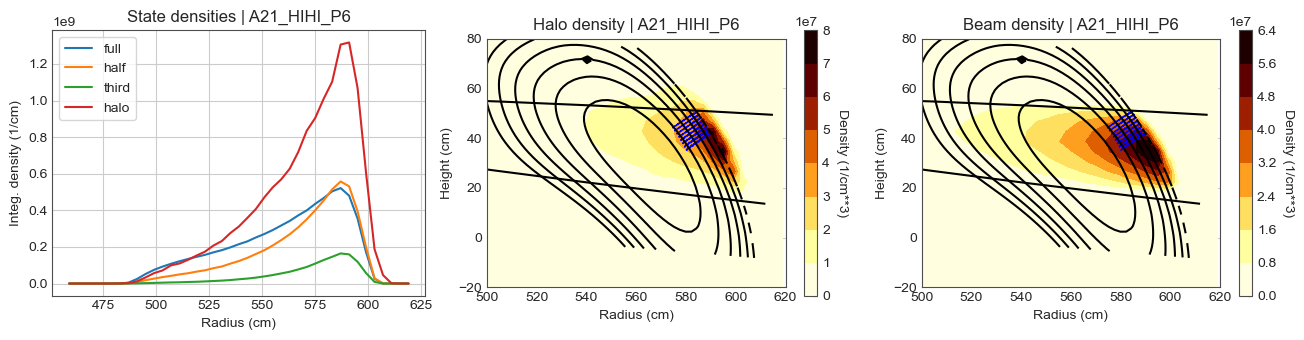

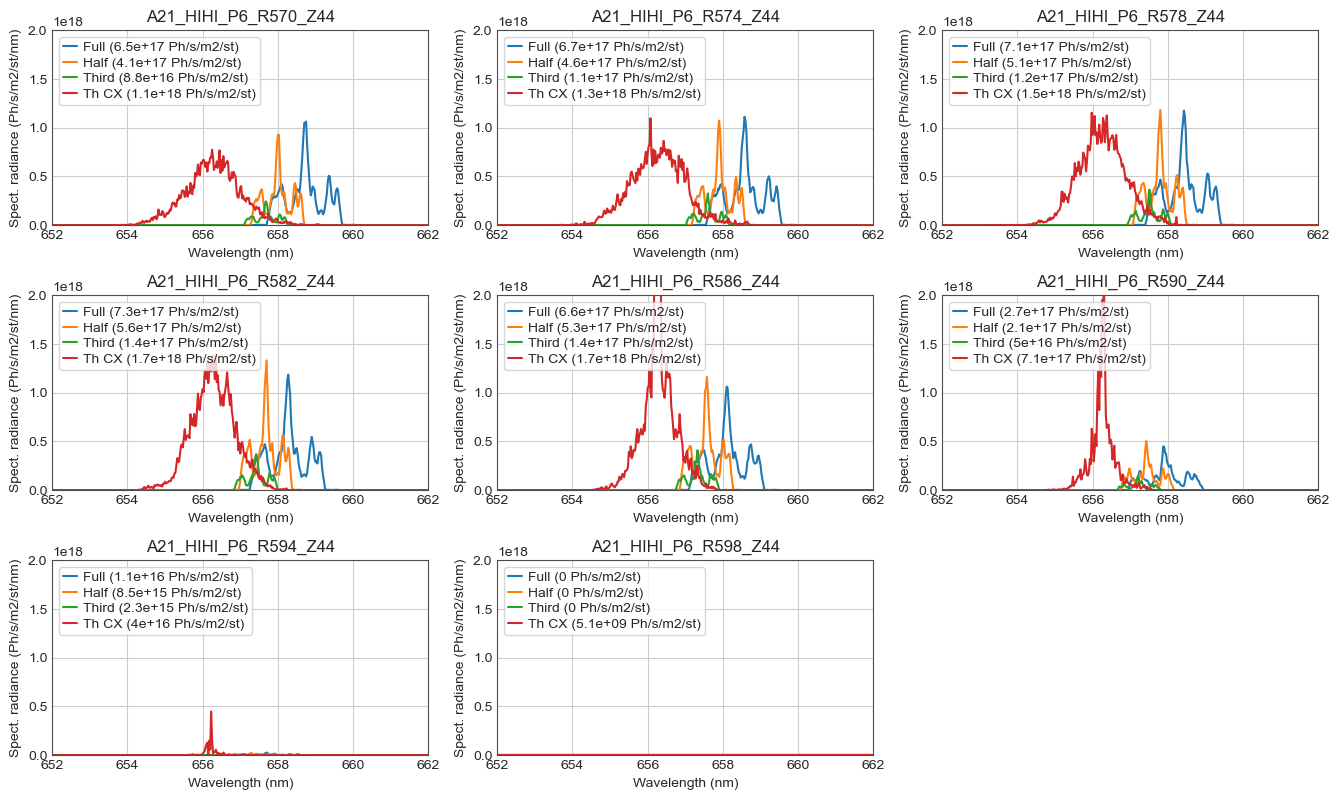

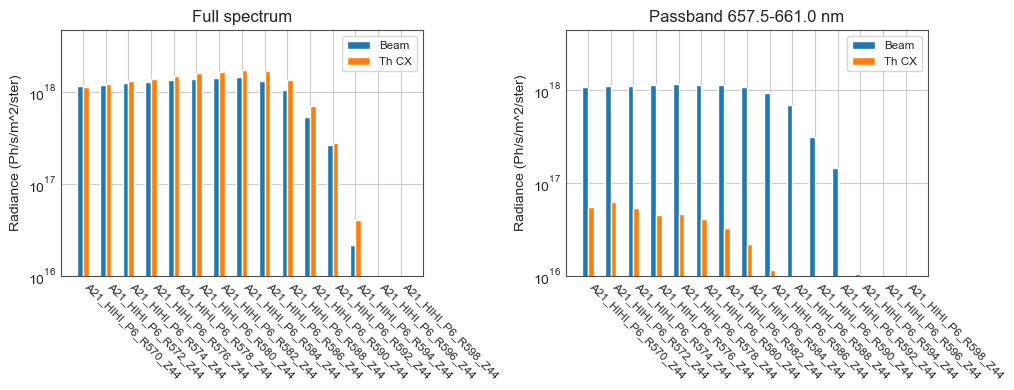

In [87]:
from fida import Fida
f = Fida(simdir='A21_HIHI_P6')
f.plot_beam_density(gridfile='data/grid_88_c2c15_P6_A21_R582_Z43_w7x_ref_29.pickle', save=True)
ilos = f.los_filter(tag='Z44')
f.plot(ilos=ilos[::2], save=True)
f.plot_array(ilos=ilos, passband=[657.5,661], save=True)

## Summary

The aperture on source 7 clips the lower region of the beam where the **W30** field of view observes with optimal field alignment.  The W30 field of view must shift up about 6 cm to meet the source 7 beam density.  The shift degrades field alignment and increases the radial localizaiton from 1.5 cm to 2 cm.

# Optical throughput and signal estimation

## Optical throughput

# W30 viewing source 7

Lens diameter = 6.0 cm and fiber NA = 0.333
  Spot size 1.0 cm -> fiber diameter 0.38 mm -> etendue 0.040 mm^2-ster
  Spot size 1.5 cm -> fiber diameter 0.58 mm -> etendue 0.091 mm^2-ster
Lens diameter = 8.0 cm and fiber NA = 0.333
  Spot size 1.0 cm -> fiber diameter 0.51 mm -> etendue 0.072 mm^2-ster
  Spot size 1.5 cm -> fiber diameter 0.77 mm -> etendue 0.162 mm^2-ster


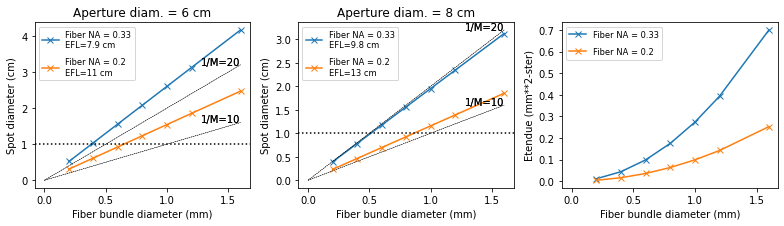

In [1]:
import optics
optics.plot(save=True, spot_distance=230)

### A21-hihi viewing source 6

Lens diameter = 6.0 cm and fiber NA = 0.333
  Spot size 1.0 cm -> fiber diameter 0.49 mm -> etendue 0.066 mm^2-ster
  Spot size 1.5 cm -> fiber diameter 0.74 mm -> etendue 0.148 mm^2-ster
Lens diameter = 8.0 cm and fiber NA = 0.333
  Spot size 1.0 cm -> fiber diameter 0.65 mm -> etendue 0.117 mm^2-ster
  Spot size 1.5 cm -> fiber diameter 0.98 mm -> etendue 0.264 mm^2-ster


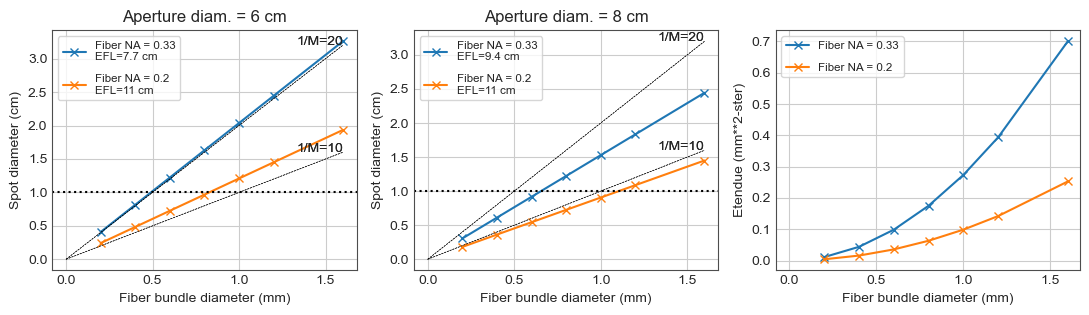

In [89]:
import optics
optics.plot(save=True, spot_distance=180)

## Signal estimation

### W30 viewing source 7

In [4]:
from signals import calc_signal
calc_signal(emission_radiance=0.8e18,  # photons/m^2/ster
            fiber_diameter=0.51,  # mm
            spot_diameter=1,  # cm
            distance=230,  # cm
            aperture=8,  # cm
            )

Fiber NA = 0.333
Fiber diameter = 0.51 mm
Spot diameter = 1.00 cm
Lens-spot distance = 230.0 cm
Lens diameter = 8.0 cm
Emission radiance = 8e+17 ph/m^2/ster
Fiber etendue = 0.0712 mm**2-ster
Emitter etendue = 0.0746 mm**2-ster
Emission power = 17.2 nW
Assume 50.0% transmission loss
Transmitted power = 8.6 nW
Assume 4.5 mV/nW preamp response (with x10 preamp gain)
Preamp signal = 38.8 mV


### A21-hihi viewing source 6

In [95]:
from signals import calc_signal
calc_signal(emission_radiance=1e18,  # photons/m^2/ster
            fiber_diameter=1,  # mm
            spot_diameter=1.5,  # cm
            distance=180,  # cm
            aperture=8,  # cm
            )

Fiber NA = 0.333
Fiber diameter = 1.00 mm
Spot diameter = 1.50 cm
Lens-spot distance = 180.0 cm
Lens diameter = 8.0 cm
Emission radiance = 1e+18 ph/m^2/ster
Fiber etendue = 0.2736 mm**2-ster
Emitter etendue = 0.2742 mm**2-ster
Emission power = 83.0 nW
Assume 50.0% transmission loss
Transmitted power = 41.5 nW
Assume 4.5 mV/nW preamp response (with x10 preamp gain)
Preamp signal = 186.8 mV


## Summary

| **View (8 cm aperture diameter)** | **Spot size** | **Fiber diameter (NA=0.333)** | **Etendue** | **Radiance** | **Light on diode** |
| :--- | :---: | :---: | :---: | :---: | :---: |
| W30 viewing Source 7 at 230 cm distance | 1 cm | 0.5 mm | 0.07 mm^2-ster | 3e17 Ph/m^2/ster | 3.4 nW |
| W30 viewing Source 7 at 230 cm distance | 1.5 cm | 0.8 mm| 0.16 mm^2-ster | 3e17 Ph/m^2/ster | 7.6 nW |
| A21-HIHI viewing Source 6 at 180 cm distance | 1 cm | 0.65 mm | 0.12 mm^2-ster | 1e18 Ph/m^2/ster | 18.4 nW |
| A21-HIHI viewing Source 6 at 180 cm distance | 1.5 cm | 1 mm | 0.26 mm^2-ster | 1e18 Ph/m^2/ster | 42 nW |

<!---
**Optical throughput**
- W30 viewing source 7 with 230 cm object distance
  - 6 cm diameter lens and 1 cm spot size -> 0.05 mm**2-ster throughput
- A21-HIHI viewing source 6 with 180 cm object distance
  - 6 cm diameter lens and 1.5 cm spot size -> 0.15 mm**2-ster throughput
--->

# Magnetic configurations

## W30 viewing source 7

high mirror
Saving plots/W30_P7_w7x_ref_9.pdf
low iota
Saving plots/W30_P7_w7x_ref_20.pdf
high iota
Saving plots/W30_P7_w7x_ref_17.pdf


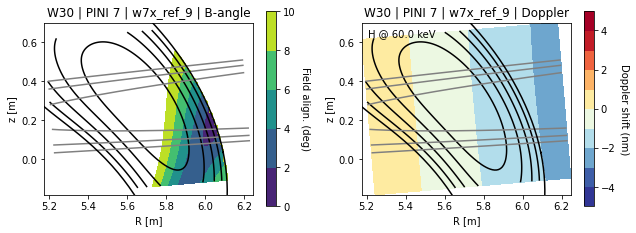

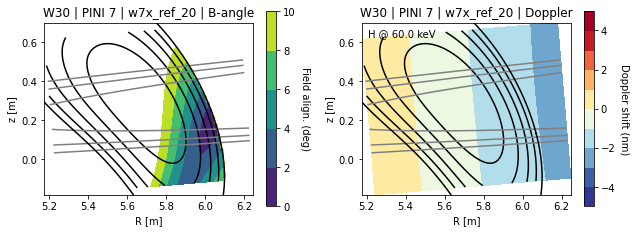

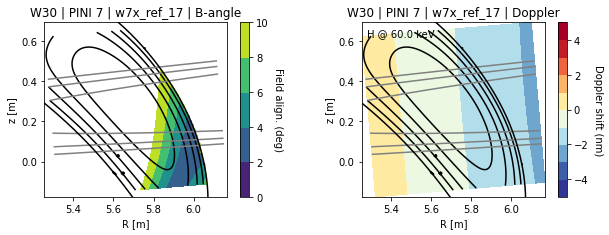

In [2]:
import beams
from grid import Grid
eqs = {'standard':'w7x_ref_9',
       'low iota':'w7x_ref_20',
       'high iota':'w7x_ref_17'}
source = beams.HeatingBeam(pini=7)
for key, eq_tag in eqs.items():
    print(key)
    source.plot_vertical_plane(port='W30', eq_tag=eq_tag, save=True)

## A21-hihi viewing source 6

high mirror
Saving plots/A21-hihi_P6_w7x_ref_9.pdf
low iota
Saving plots/A21-hihi_P6_w7x_ref_20.pdf
high iota
Saving plots/A21-hihi_P6_w7x_ref_17.pdf


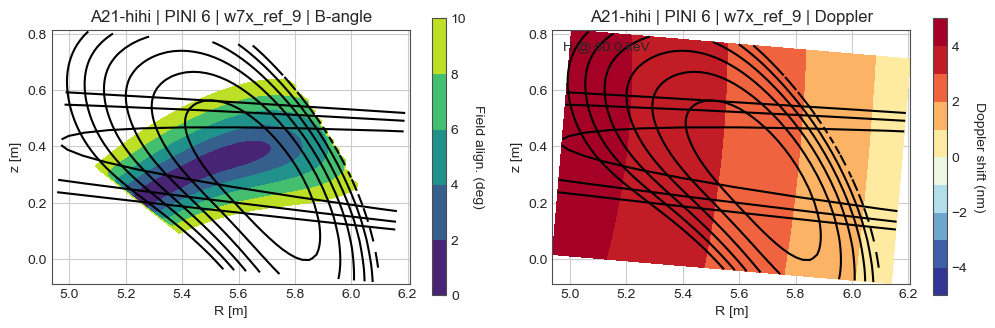

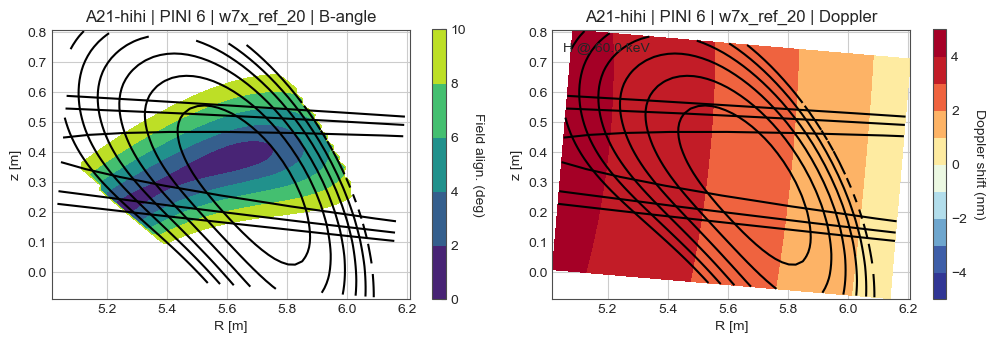

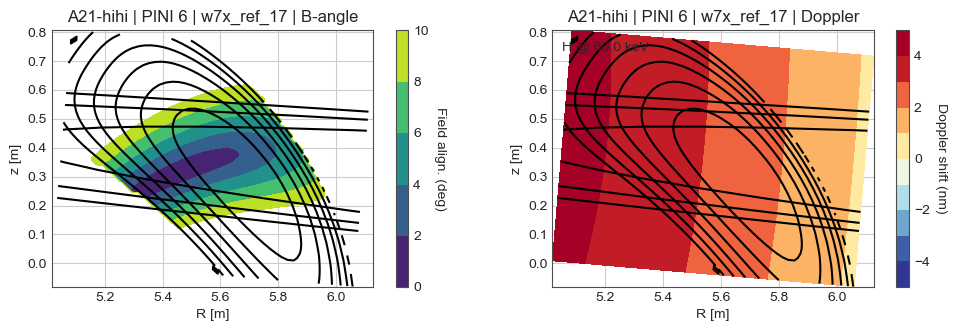

In [93]:
source = beams.HeatingBeam(pini=6)
for key, eq_tag in eqs.items():
    print(key)
    source.plot_vertical_plane(port='A21-hihi', eq_tag=eq_tag, save=True)

## Summary

Relative to **high mirror**, the **low iota** configuration gives slightly better field alignment, and the **high iota** configuration gives slightly worse field alignment.

# Conclusions


Two diagnostic configurations emerged as good condidates for fluctuation BES measurements

- W30 viewing source 7 (or W11 viewing source 3)
  - Blue shift view with good outer radius coverage, r/a ~ 0.6-1
  - Longer distance from port to beam, 2.3 m
  - Good field alignment allows small spot size and small channel-to-channel spacing, ~ 1 cm
  - **The aperture on source 7 clips the lower region of the beamwith optimal field alignment.  The W30 field of view must shift up about 6 cm to meet the source 7 beam density.  The shift degrades field alignment and increases the radial localizaiton from 1.5 cm to 2 cm.**
  - Lower emission flux to diode, ~ 3-10 nW (with 8 cm aperture diameter)
- A21-high viewing source 6 (or A21-low viewing source 2)
  - **Sources 2/6 will not be available for OP2**
  - **A21 is fully occupied**
  - Red shift with good mid-radius coverage, r/a ~ 0.4-0.8
  - Shorter distance from port to beam, 1.8 m
  - Slight misalignment with field limits spot size and channel-to-channel spacing to ~ 1.5 cm
  - Higher emission flux to diode, ~ 20-50 nW (with 8 cm aperture diameter)